### Create directory and upload urls file into your server

In [204]:
from fastai import *
from fastai.vision import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Download images

In [161]:
# Data Hirerachy, want to build two classifier, first only classify igneous/sedimentary/metamorphic, second will classify which rock type it is, ie. granite/non-granite/whateveritis....
# I get the hirerachy from https://geology.com/rocks/ and scrape image from google
# source 

In [162]:
search_dict = {
    'Igneous Rock': [
        'Andesite',
        'Basalt',
        'Dacite',
        'Quartz',
        'Diorite',
        'Gabbro',
        'Granite',
        'Obsidian',
        'Pegmatite',
        'Peridotite',
        'Pumice',
        'Rhyolite',
        'Scoria',
        'Tuff',
        'Unakite ',
    ],
    'Metamorphic Rock': [
        'Amphibolite',
        'Gneiss',
        'Gneiss',
        'Hornfels',
        'Lapis Lazuli',
        'Marble',
        'Mariposite',
        'Novaculite',
        'Phyllite',
        'Quartzite ',
        'Schist',
        'Skarn',
        'Slate',
        'Soapstone ',
    ],
    'Sedimentary Rock': [
        'Breccia',
        'Caliche',
        'Caliche',
        'Chert',
        'Coal Rock',
        'Conglomerate ',
        'Diatomite',
        'Dolomite',
        'Flint',
        'Iron Ore',
        'Limestone',
        'Oil Sands',
        'Rock Salt',
        'Sandstone',
        'Shale',
        'Siltstone',
    ]
}

In [163]:
import requests
from bs4 import BeautifulSoup
import urllib
import json

In [164]:
def get_search_string_dict(search_dict):
    
    search_string_dict = {}
    
    for key, keywords_list in search_dict.items():
        for i, keyword in enumerate(keywords_list):
            tmp = keywords_list[i]
            tmp_list = keywords_list.copy()
            tmp_list.remove(tmp_list[i])
        
            search_string = tmp + ' -' + ' -'.join([f'"{keyword}"' for keyword in tmp_list]) + f' :"{key}"' # to make precise search, filter unwanted result, and give good context
            search_string_dict[keyword] = search_string
    return search_string_dict

In [165]:
def get_page(search_string):
    base_url = 'https://www.google.com/search?tbm=isch&q='
    header={'User-Agent':"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/43.0.2357.134 Safari/537.36"
    }
    page = requests.request('GET', base_url + search_string, headers=header)
    return page

In [166]:
def extract_text(x):
    return dict(json.loads(x.text))['ou']

In [167]:
def get_images_urls(page):
    soup = BeautifulSoup(page.content)
    html = soup.select('.rg_di .rg_meta')
    urls =  list(map(extract_text, html))
    return urls      

In [149]:
search_string_dict = get_search_string_dict(search_dict);

In [155]:
classes = []
for key in search_string_dict.keys():
    classes.append(key)
classes[-2:]
    

['Shale', 'Siltstone']

In [209]:
search_string_dict[classes[0]] # a sample search string

'Andesite -"Basalt" -"Dacite" -"Quartz" -"Diorite" -"Gabbro" -"Granite" -"Obsidian" -"Pegmatite" -"Peridotite" -"Pumice" -"Rhyolite" -"Scoria" -"Tuff" -"Unakite " :"Igneous Rock"'

In [ ]:
path = Path('data/rocks')
path.mkdir(exist_ok=True)

In [156]:
for bar,key in enumerate(progress_bar(classes)):
    
    x = search_string_dict[key]
    x = get_page(x)
    
    urls = get_images_urls(x)    
    urls = pd.DataFrame(urls)
    urls.to_csv(path/f'{key}.txt', index=False, header=False) # To match the format for download_images.
    
    # import time
    # time.sleep(5) # Delays for 5 seconds. If you are doing a lot of scraping, try not to scrape too fast.

# Data Scraping 
Images are scraped from Google Image. 
download_images() Credit to Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In [206]:
for class_name in classes:
    folder = class_name
    file = f'{class_name}.txt'
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    print(file)
    download_images(path/file, dest, max_pics=200, max_workers=None)

Andesite.txt


Error https://l450v.alamy.com/450v/by2dhm/andesite-igneous-rock-sample-by2dhm.jpg 'content-length'
Error https://c8.alamy.com/compes/ffambg/la-andesita-porfido-roca-ignea-erupciones-mexico-ffambg.jpg 'content-length'
Error https://mineral-forum.com/message-board/files/imag0412_197.jpg HTTPSConnectionPool(host='mineral-forum.com', port=443): Max retries exceeded with url: /message-board/files/imag0412_197.jpg (Caused by SSLError(SSLCertVerificationError("hostname 'mineral-forum.com' doesn't match 'www.mineral-forum.com'")))
Error https://c8.alamy.com/comp/GX7KKR/collection-from-specimens-of-andesite-rock-isolated-on-white-background-GX7KKR.jpg 'content-length'
Error https://c8.alamy.com/comp/X0KR8K/collection-from-specimens-of-andesite-rock-X0KR8K.jpg 'content-length'
Error "https://ih1.redbubble.net/image.357028107.7722/flat,1000x1000,075,f.u1.jpg" No connection adapters were found for '"https://ih1.redbubble.net/image.357028107.7722/flat,1000x1000,075,f.u1.jpg"'
Error http://hasshe.co

Error https://c8.alamy.com/comp/DT5DW3/basalt-rock-sample-DT5DW3.jpg 'content-length'
Error https://quatr.us/wp-content/uploads/2017/06/basalt.jpg 'content-length'
Error https://c8.alamy.com/comp/GRA9J8/macro-shooting-of-igneous-rock-specimens-glassy-basalt-glassbasalt-GRA9J8.jpg 'content-length'
Error http://www.chinaneolithic.com/RockPhoto/EN/Basalt/Basalt.jpg HTTPConnectionPool(host='www.chinaneolithic.com', port=80): Max retries exceeded with url: /RockPhoto/EN/Basalt/Basalt.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fe11a473940>: Failed to establish a new connection: [Errno 110] Connection timed out'))
Error https://c8.alamy.com/comp/XE506R/igneous-rock-basalt-XE506R.jpg 'content-length'
Error "http://slideplayer.com/10859814/39/images/12/Basalt%20Basalt%20is%20a%20fine-grained,%20dark-colored%20extrusive%20igneous%20rock%20composed%20mainly%20of%20plagioclase%20and%20pyroxene..jpg" No connection adapters were found for '"http://slideplayer.

Error https://static3.bigstockphoto.com/5/4/1/large1500/145927268.jpg 'content-length'
Error "https://i3.cpcache.com/product/1120313582/Dacite_igneous_rock_Sticker_Oval_300x300.jpg?height=300&width=300&qv=90&side=front&Filters=[{%22name%22:%22background%22,%22value%22:%22ddddde%22,%22sequence%22:2}]" No connection adapters were found for '"https://i3.cpcache.com/product/1120313582/Dacite_igneous_rock_Sticker_Oval_300x300.jpg?height=300&width=300&qv=90&side=front&Filters=[{%22name%22:%22background%22,%22value%22:%22ddddde%22,%22sequence%22:2}]"'
Error https://c8.alamy.com/compit/ec82pb/dacite-roccia-vulcanica-con-composizione-intermedia-tra-felsic-e-mafic-rocks-ec82pb.jpg 'content-length'
Error http://www-odp.tamu.edu/publications/193_IR/chap_01/images/01_f38.jpg 'content-length'
Error https://hotcopper.com.au/data/attachments/1244/1244012-673a2fb9c04bce9cbdd66ba0a40339e2.jpg Exceeded 30 redirects.
Error http://www.gallatinrivertaskforce.org/wp-content/uploads/2015/11/2015-07-14-11.36.2

KeyboardInterrupt: 

Good! Let's take a look at some of our pictures then.

In [ ]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=4)

## View data

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c

## Train model

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(4)

In [44]:
learn.save('stage-1-rocks')

In [45]:
learn.unfreeze()

In [46]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


Exception ignored in: <function _DataLoaderIter.__del__ at 0x7fae3a6f21e0>
Traceback (most recent call last):
  File "/home/mediumnok/.conda/envs/fastai/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 717, in __del__
    self._shutdown_workers()
  File "/home/mediumnok/.conda/envs/fastai/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 713, in _shutdown_workers
    w.join()
  File "/home/mediumnok/.conda/envs/fastai/lib/python3.7/multiprocessing/process.py", line 140, in join
    res = self._popen.wait(timeout)
  File "/home/mediumnok/.conda/envs/fastai/lib/python3.7/multiprocessing/popen_fork.py", line 48, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/home/mediumnok/.conda/envs/fastai/lib/python3.7/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 


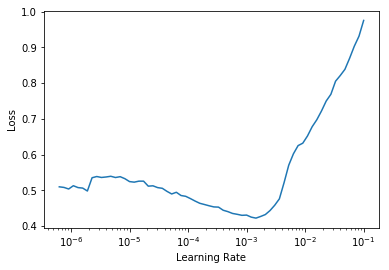

In [47]:
learn.recorder.plot()

In [51]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

Total time: 00:27
epoch  train_loss  valid_loss  error_rate
1      0.478554    0.585755    0.269231    (00:13)
2      0.490595    0.578649    0.243590    (00:13)



In [52]:
learn.save('stage-2-containers')

In [53]:
learn.load('stage-2-containers')

## Interpretation

In [54]:
interp = ClassificationInterpretation.from_learner(learn)

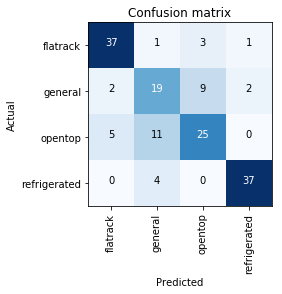

In [55]:
interp.plot_confusion_matrix()

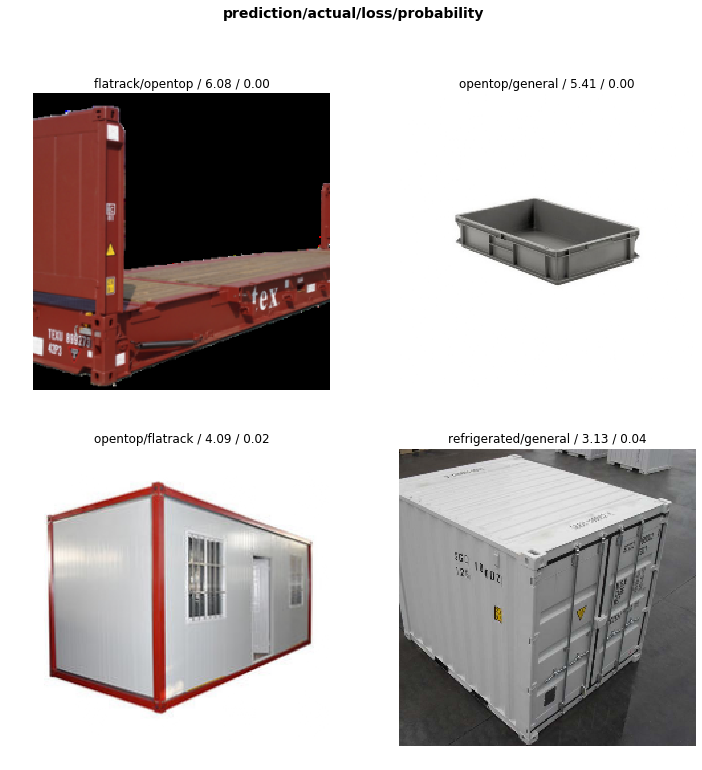

In [56]:
interp.plot_top_losses(4)

#### You can see for the first exmaple, the model is quite sure it is a regrigerated container, but the label is actually Highcube. In this case, the model is actually correct and it is a mis-label

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `FileDeleter` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

First we need to get the file paths from our top_losses. Here's a handy function that pulls out all our top_losses:

In [57]:
from fastai.widgets import *

losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

Now we can pass in these paths to our widget.

In [58]:
fd = FileDeleter(file_paths=top_loss_paths)

Button(button_style='primary', description='Confirm', style=ButtonStyle())

Flag photos for deletion by clicking 'Delete'. Then click 'Confirm' to delete flagged photos and keep the rest in that row. The `File_Deleter` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses`.

## Putting your model in production

In [59]:
data.classes

['flatrack', 'general', 'opentop', 'refrigerated']

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [60]:
# fastai.defaults.device = torch.device('cpu')

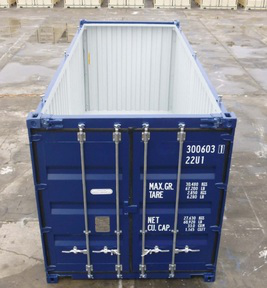

In [61]:
img = open_image(path/'opentop'/'00000039.jpg')
img

In [74]:
classes = ['flatrack', 'general', 'opentop', 'refrigerated']
data2 = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load('stage-2-containers')

In [72]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

'opentop'

So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

## Things that can go wrong

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate
  - Number of epochs

### Learning rate (LR) too high

In [88]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [87]:
learn.fit_one_cycle(1, max_lr=0.5)

Total time: 00:12
epoch  train_loss  valid_loss  error_rate     
1      19.205343   80275072.000000  0.737179    (00:12)



### Learning rate (LR) too low

In [89]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Previously we had this result:

```
Total time: 00:57
epoch  train_loss  valid_loss  error_rate
1      1.030236    0.179226    0.028369    (00:14)
2      0.561508    0.055464    0.014184    (00:13)
3      0.396103    0.053801    0.014184    (00:13)
4      0.316883    0.050197    0.021277    (00:15)
```

In [90]:
learn.fit_one_cycle(5, max_lr=1e-5)

Total time: 01:04
epoch  train_loss  valid_loss  error_rate
1      1.846892    1.460822    0.692308    (00:12)
2      1.822263    1.449666    0.685897    (00:12)
3      1.818573    1.452975    0.660256    (00:12)
4      1.806075    1.466667    0.653846    (00:13)
5      1.804038    1.476455    0.679487    (00:13)



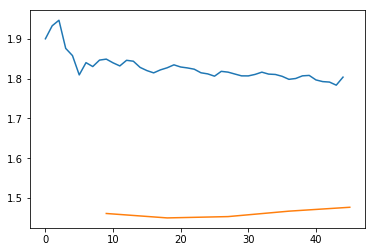

In [91]:
learn.recorder.plot_losses()

As well as taking a really long time, it's getting too many looks at each image, so may overfit.

### Too few epochs

In [105]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [106]:
learn.fit_one_cycle(1)

Total time: 00:14
epoch  train_loss  valid_loss  error_rate
1      1.271487    0.711475    0.280255    (00:14)



### Too many epochs

In [107]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [108]:
learn = create_cnn(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [111]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))

Total time: 07:22
epoch  train_loss  valid_loss  error_rate
1      1.517631    1.572828    0.802288    (00:12)
2      1.546593    1.550419    0.826797    (00:11)
3      1.545142    1.528509    0.815359    (00:11)
4      1.478895    1.492109    0.790850    (00:10)
5      1.433474    1.442667    0.728758    (00:10)
6      1.337803    1.386668    0.679739    (00:10)
7      1.270900    1.327418    0.642157    (00:11)
8      1.200847    1.269937    0.591503    (00:11)
9      1.121168    1.216577    0.545752    (00:10)
10     1.029964    1.176654    0.519608    (00:11)
11     0.959061    1.140666    0.488562    (00:11)
12     0.887489    1.114502    0.480392    (00:10)
13     0.824836    1.097068    0.470588    (00:10)
14     0.767771    1.091737    0.464052    (00:11)
15     0.717235    1.086249    0.465686    (00:11)
16     0.665047    1.078649    0.449346    (00:10)
17     0.620755    1.081273    0.446078    (00:11)
18     0.578923    1.082510    0.444444    (00:11)
19     0.551266    1.0